## Secant Method

Secant method is another numerical approach to solve a nonlinear equation. This method is the development of Newton-Raphson approach where remain considering the first derivative of a given function into the calculation. The secant method overcome this problem with expand the formula instead use the first derivative of function directly. We know that the Newton-Raphson's approach is

$x_r = x_0 - \frac {f(x_0)} {f'(x_0)} $

Then, in the Secant Method this formula is expanded to

$x_r = x_0 - \frac {f(x_0)} {f'(x_0)} = x_0 - \frac {f(x_0) (x_1 - x_0)} {f(x_1) - f(x_0)}$

The equation above can be simplified as

$x_r = x_0 (f(x_1) - f(x_0)) - \frac {f(x_0) (x_1 - x_0)} {f(x_1) - f(x_0)}$

$x_r = \frac {x_0 f(x_1) - x_0 f(x_0) - f(x_0) x_1 + f(x_0) x_0} {f(x_1) - f(x_0)}$

**Equation 1**

$x_r = \frac {x_0 f(x_1) - f(x_0) x_1} {f(x_1) - f(x_0)}$

The latest equation above is the Secant Method approach. The equation is similar to the False Position. However, the algorithm approach of the Secant Method does not apply the initial condition and midpoint calcualtion as the False Position does. The Secant Method will update the root estimation with the previous one.

### Stopping Criteria

We can use the relative error criterion for the stopping iteration process by the following equation.

**Equation 2**

$e_{rel} = |\frac{x_1 - x_{r}} {x_1}| \le e_{tol}$

if the $e_{rel}$ is less than $e_{tol}$, the process will be stopped.

### Algorithm of Secant Method
1. Define the stopping criteria, $e_{tol}$
2. Define the initial roots, $x_0$ and $x_1$
3. Calculate the root, $x_r$, by using the equation 1
4. Set $x_0 = x_1$ and $x_1 = x_r$
5. Calculate the relative error by using equation 2.
6. If the $e_{rel}$ still greater than $e_{tol}$, repeat the process 2-6 with the updated root of $x_0$ and $x_1$ from point 4.

### Case 1

There is a function of $f(x) = x^2 - 4 = 0$. Find its root using the Newton-Raphson method. Note, as we know that this function has a root of $-2$ or $2$ (two different signs). Let us try with the initial guess value of $3$.

First, we solve the first derivative of above function, where

$f'(x) = \frac {df(x)} {dx} = \frac {d (x^2 - 4)} {dx} = 2x$



In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def secantmethod(f,x0,x1,e_rel=1,e_tol=1e-5):
  if (f(x1) - f(x0)) == 0:
    print('Error: Zero Division')
    return 0, 0, 0

  e_rels = []

  while e_rel >= e_tol:
    e_rels.append(e_rel)
    xroot = ((x0 * f(x1)) - (x1 * f(x0))) / (f(x1) - f(x0))

    # calculating relative error
    e_rel = np.abs((x1 - xroot)/x1)

    # updateing new approxiamation root
    x0, x1 = x1, xroot

  return xroot, e_rel, e_rels

In [11]:
e_tol = 1e-5
e_rel = 1
x0 = 1
x1 = 4

# creating a simple function using lambda
f = lambda x: x**2 - 4

xroot, e_rel, e_rels = secantmethod(f,x0,x1,e_rel,e_tol)

print('The approximation root is: %f' % xroot)
print('The relative error is: %f' % e_rel)

The approximation root is: 2.000000
The relative error is: 0.000001


Text(0, 0.5, 'Relative Error')

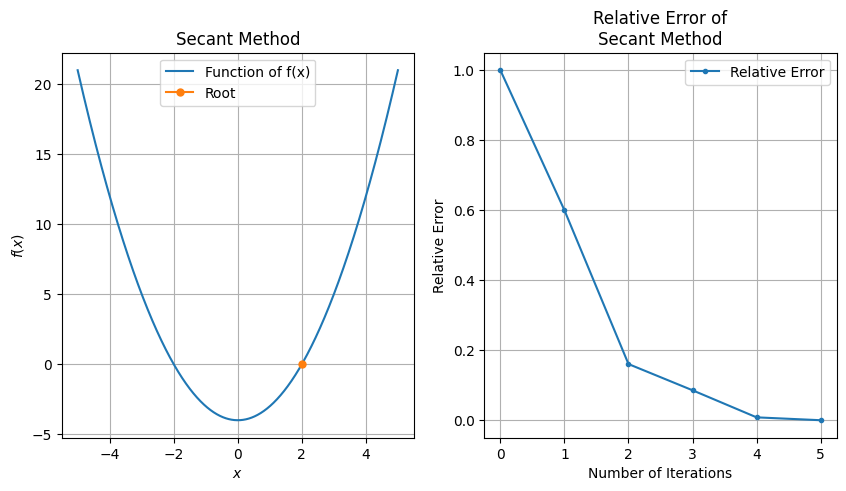

In [12]:
a,b = -5,5
x = np.linspace(a,b,1000)
fig, ax = plt.subplots(figsize=(10,5), ncols=2)
ax[0].plot(x,f(x), label='Function of f(x)')
ax[0].plot(xroot,f(xroot), marker='.', markersize=10, label='Root')
ax[0].set_axisbelow(True)
ax[0].grid()
ax[0].legend()
ax[0].set_title('Secant Method')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$f(x)$')

ax[1].plot(e_rels, marker='.', label='Relative Error')
ax[1].set_axisbelow(True)
ax[1].grid()
ax[1].legend()
ax[1].set_title('Relative Error of\nSecant Method')
ax[1].set_xlabel('Number of Iterations')
ax[1].set_ylabel('Relative Error')


After six iterations, the root is perfectly estimated, where the root is 2 with the final relative error is about 0.000001 as shown in Figure above.

### Case 2

There is a function of $f(x) = x^2 + 4x + 4 = 0$. We now, by analytical solution, this function has the two solutions of root of $-2$ with the same sign. Hence, the root lies in the negative direction. Therefore, find its root by using Secant Method where the $x_0 = -3$ and $x_1 = 1$.

In [13]:
e_tol = 1e-5
e_rel = 1
x0 = -3
x1 = 1

# creating a simple function using lambda
f = lambda x: x**2 + 4*x + 4

xroot, e_rel, e_rels = secantmethod(f,x0,x1,e_rel,e_tol)

print('The approximation root is: %f' % xroot)
print('The relative error is: %f' % e_rel)

The approximation root is: -2.000029
The relative error is: 0.000009


Text(0, 0.5, 'Relative Error')

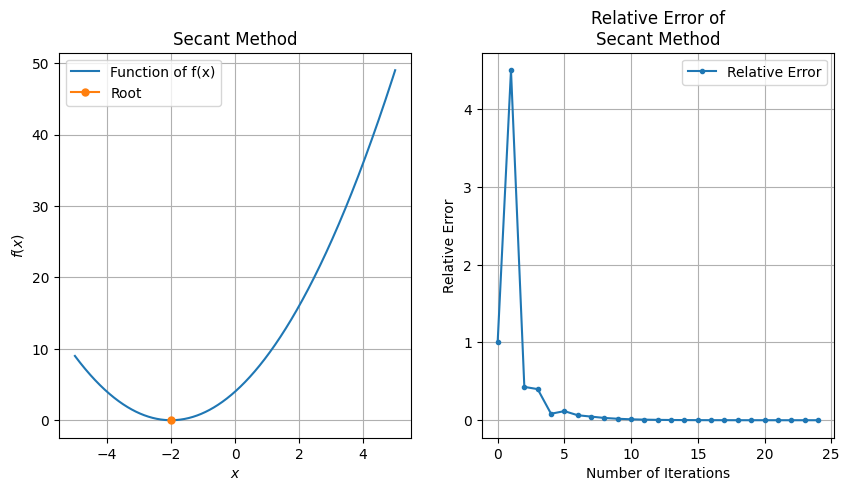

In [14]:
a,b = -5,5
x = np.linspace(a,b,1000)
fig, ax = plt.subplots(figsize=(10,5), ncols=2)
ax[0].plot(x,f(x), label='Function of f(x)')
ax[0].plot(xroot,f(xroot), marker='.', markersize=10, label='Root')
ax[0].set_axisbelow(True)
ax[0].grid()
ax[0].legend()
ax[0].set_title('Secant Method')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$f(x)$')

ax[1].plot(e_rels, marker='.', label='Relative Error')
ax[1].set_axisbelow(True)
ax[1].grid()
ax[1].legend()
ax[1].set_title('Relative Error of\nSecant Method')
ax[1].set_xlabel('Number of Iterations')
ax[1].set_ylabel('Relative Error')


The solution is found after 24 iterations although at the second iteration the error increases significantly, it become significantly decreases to the last iteration where the error is about 0.000009 and the solution is -2.000029. Since the Secant Method has two initial boundaries that must be given, these values must be estimated to be close to the expected root. If the two inital boundaries are to wide, the zero division could arise as the following example where the $x_0 = -10$ and $x_1 = 10$.

In [15]:
e_tol = 1e-5
e_rel = 1
x0 = -10
x1 = 10

# creating a simple function using lambda
f = lambda x: x**2 + 4*x + 4

xroot, e_rel, e_rels = secantmethod(f,x0,x1,e_rel,e_tol)

print('The approximation root is: %f' % xroot)
print('The relative error is: %f' % e_rel)

ZeroDivisionError: float division by zero